### Building a Pair Plot

This activity introduces an approach for building a pairplot.  First, the `seaborn` library is used to build pair plots.  Then, after introducing these, you will explore a sample dataset to explore relationships between numeric features. 

### Seaborn: `sns.pairplot()`

Below is a dataset made available by Dr. Kristen Gorman from the Palmer Station, Antarctica LTER. [more info](https://github.com/allisonhorst/palmerpenguins)  The data contain anatomical measurements of three different species of penguins from three islands on the Palmer Archipelago in Antarctica.  We will use this data to create a basic pair plot, which is a grid of scatterplots that compares all quantitative features.  On the main diagonal, a histogram of each feature is drawn.  

In [1]:
import seaborn as sns

In [2]:
penguins = sns.load_dataset('penguins')

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


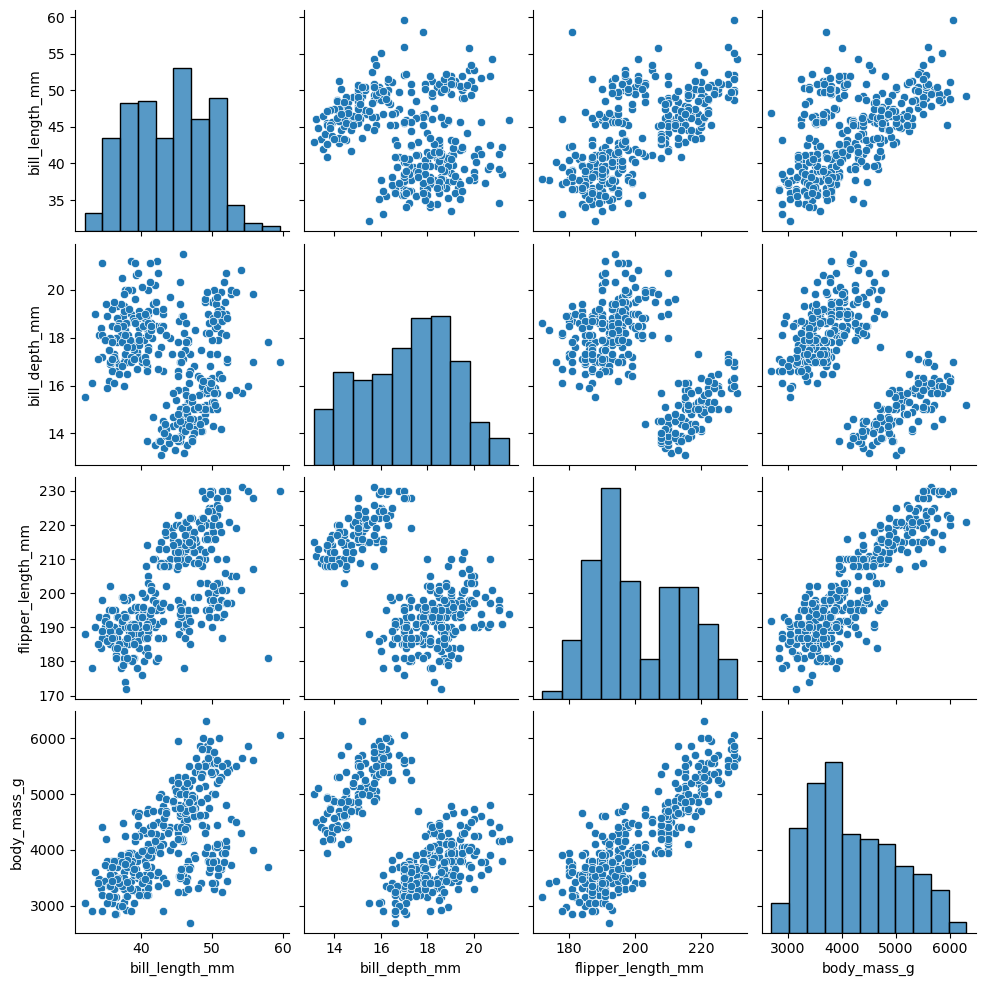

In [4]:
sns.pairplot(penguins)

In [ ]:
#Analysis:
#The penguins dataset has these variable data types:

#Numerical Variables> Quantitative
    #Bill Length (mm): A continuous variable representing the length of the penguin's bill.
    #Bill Depth (mm): A continuous variable representing the depth of the penguin's bill.
    #Flipper Length (mm): A continuous variable representing the length of the penguin's flipper.
    #Body Mass (g): A continuous variable representing the body mass of the penguin.

#Categorical Variables > Qualitative
    #Species: A categorical variable that identifies the species of the penguin (e.g., Adelie, Gentoo).
    #Island: A categorical variable indicating the island maybe where the penguis are located.
    #Sex: A categorical variable indicating the sex of the penguin (e.g., Male, Female).
#These variables provide a comprehensive view of the physical characteristics and habitat of the penguins, allowing for various analyses and visualizations.

##The data set has 7 variables and a matrix 4x4. The graphs are in symmetric grid of plots.
#EDA
    #The pairplot will show clusters of points, each representing a different species. Distinct clusters indicate that the species can be differentiated based on the measured features.
    #Relationships Between Features:

    #Bill Length vs. Bill Depth: observe that certain species have longer bills while others have deeper bills.
    #Flipper Length vs. Body Mass: have longer flippers and greater body mass.
    #Distribution Patterns: The diagonal plots show the distribution of each feature for each species. This can highlight which features are normally distributed or skewed.

    #Correlations: a strong correlation between flipper length and body mass might be visible.
    #Several multivariate are displayed in the plots as the random variables

In [7]:
correlation = penguins[['flipper_length_mm', 'body_mass_g']].corr()
print(correlation)

#A correlation coefficient close to 1 or -1 indicates a strong linear relationship, while a value close to 0 suggests weak or no linear relationship.
# In this case the correlation is btw 0.871202 and 1.0000 suggesting a string relationship.
#If the p-value from the correlation test is below a certain threshold (commonly 0.05), the relationship is considered statistically significant.
#flipper length and body mass are likely to be correlated, as larger penguins tend to have longer flippers and greater body mass.

                   flipper_length_mm  body_mass_g
flipper_length_mm           1.000000     0.871202
body_mass_g                 0.871202     1.000000


NameError: name 'plt' is not defined

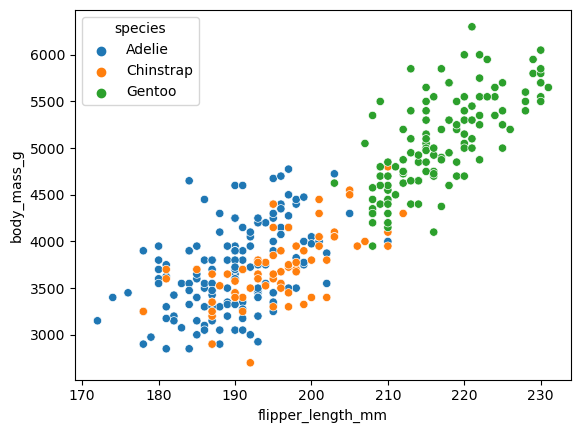

In [11]:
sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.show()
#scatter plot to visually inspect the relationship between flipper length and body mass.

#### Including Categorical Features

To label the points by a categorical feature in the data, the `hue` argument is used to specify a column to color by.  For example, setting `hue = species` will color the points by `species` and include a legend relating the color to the label. Note that the diagonal plot changes to a `kde`.  

c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


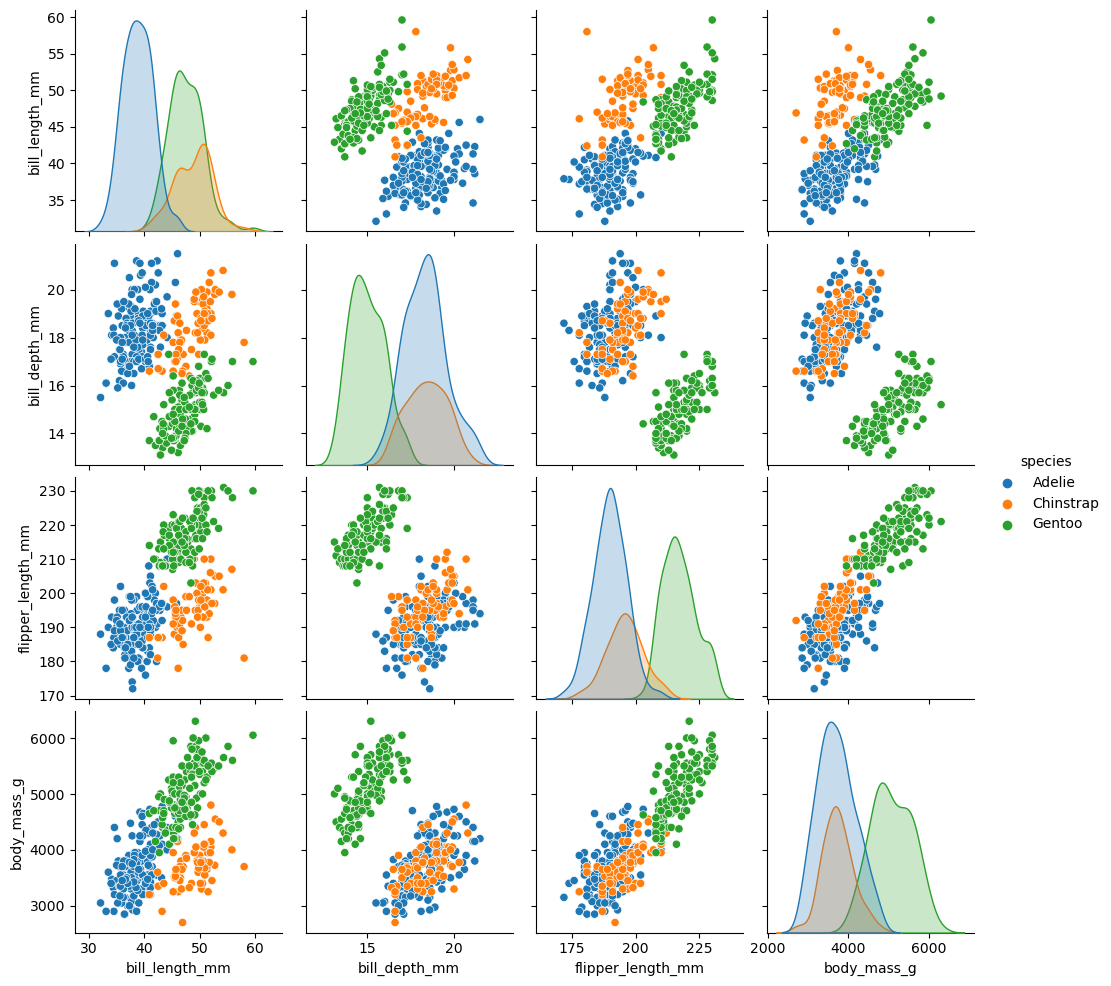

In [6]:
sns.pairplot(penguins, hue = "species")

There are many additional options available that control elements such as the kind of plot on the diagonal, color palette, and even changing the plot types off the main diagonal to be different plots.  For a deeper dive into the `.Pairgrid` see the documentation [here](https://seaborn.pydata.org/tutorial/axis_grids.html#plotting-pairwise-data-relationships).

### Example: Automotive Data

Below, we load a small dataset containing 32 observations on ten automotive cars.  The features are:

```
mpg     Miles/(US) gallon
cyl     Number of cylinders
disp     Displacement (cu.in.)
hp     Gross horsepower
drat     Rear axle ratio
wt     Weight (1000 lbs)
qsec     1/4 mile time
vs     Engine (0 = V-shaped, 1 = straight)
am     Transmission (0 = automatic, 1 = manual)
gear     Number of forward gears
carb     Number of carburetors
```

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('data/cars.csv')

In [14]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Below, we create a DataFrame considering the numeric features:

```python
['mpg', 'disp', 'hp', 'drat', 'wt', 'qsec']
```

and add a single categorical feature `vs`.  Your task is to use a `sns.pairplot()` to explore the relationships between features and which are capable of separating the categorical features:

```python
'vs', 'am', 'gear', 'carb', 'cyl'
```

Report back on your findings, specifically what relationships you are able to uncover using the pairplot on the auto data.

In [15]:
#create a DataFrame from floats
#and add a categorical feature "vs"
s1 = pd.concat((df[['mpg', 'disp', 'hp', 'drat', 'wt', 'qsec']], df[['vs']]), axis = 1)

In [16]:
s1.head()

,mpg,disp,hp,drat,wt,qsec,vs
0,21.0,160.0,110,3.90,2.620,16.46,0
1,21.0,160.0,110,3.90,2.875,17.02,0
2,22.8,108.0,93,3.85,2.320,18.61,1
3,21.4,258.0,110,3.08,3.215,19.44,1
4,18.7,360.0,175,3.15,3.440,17.02,0


c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


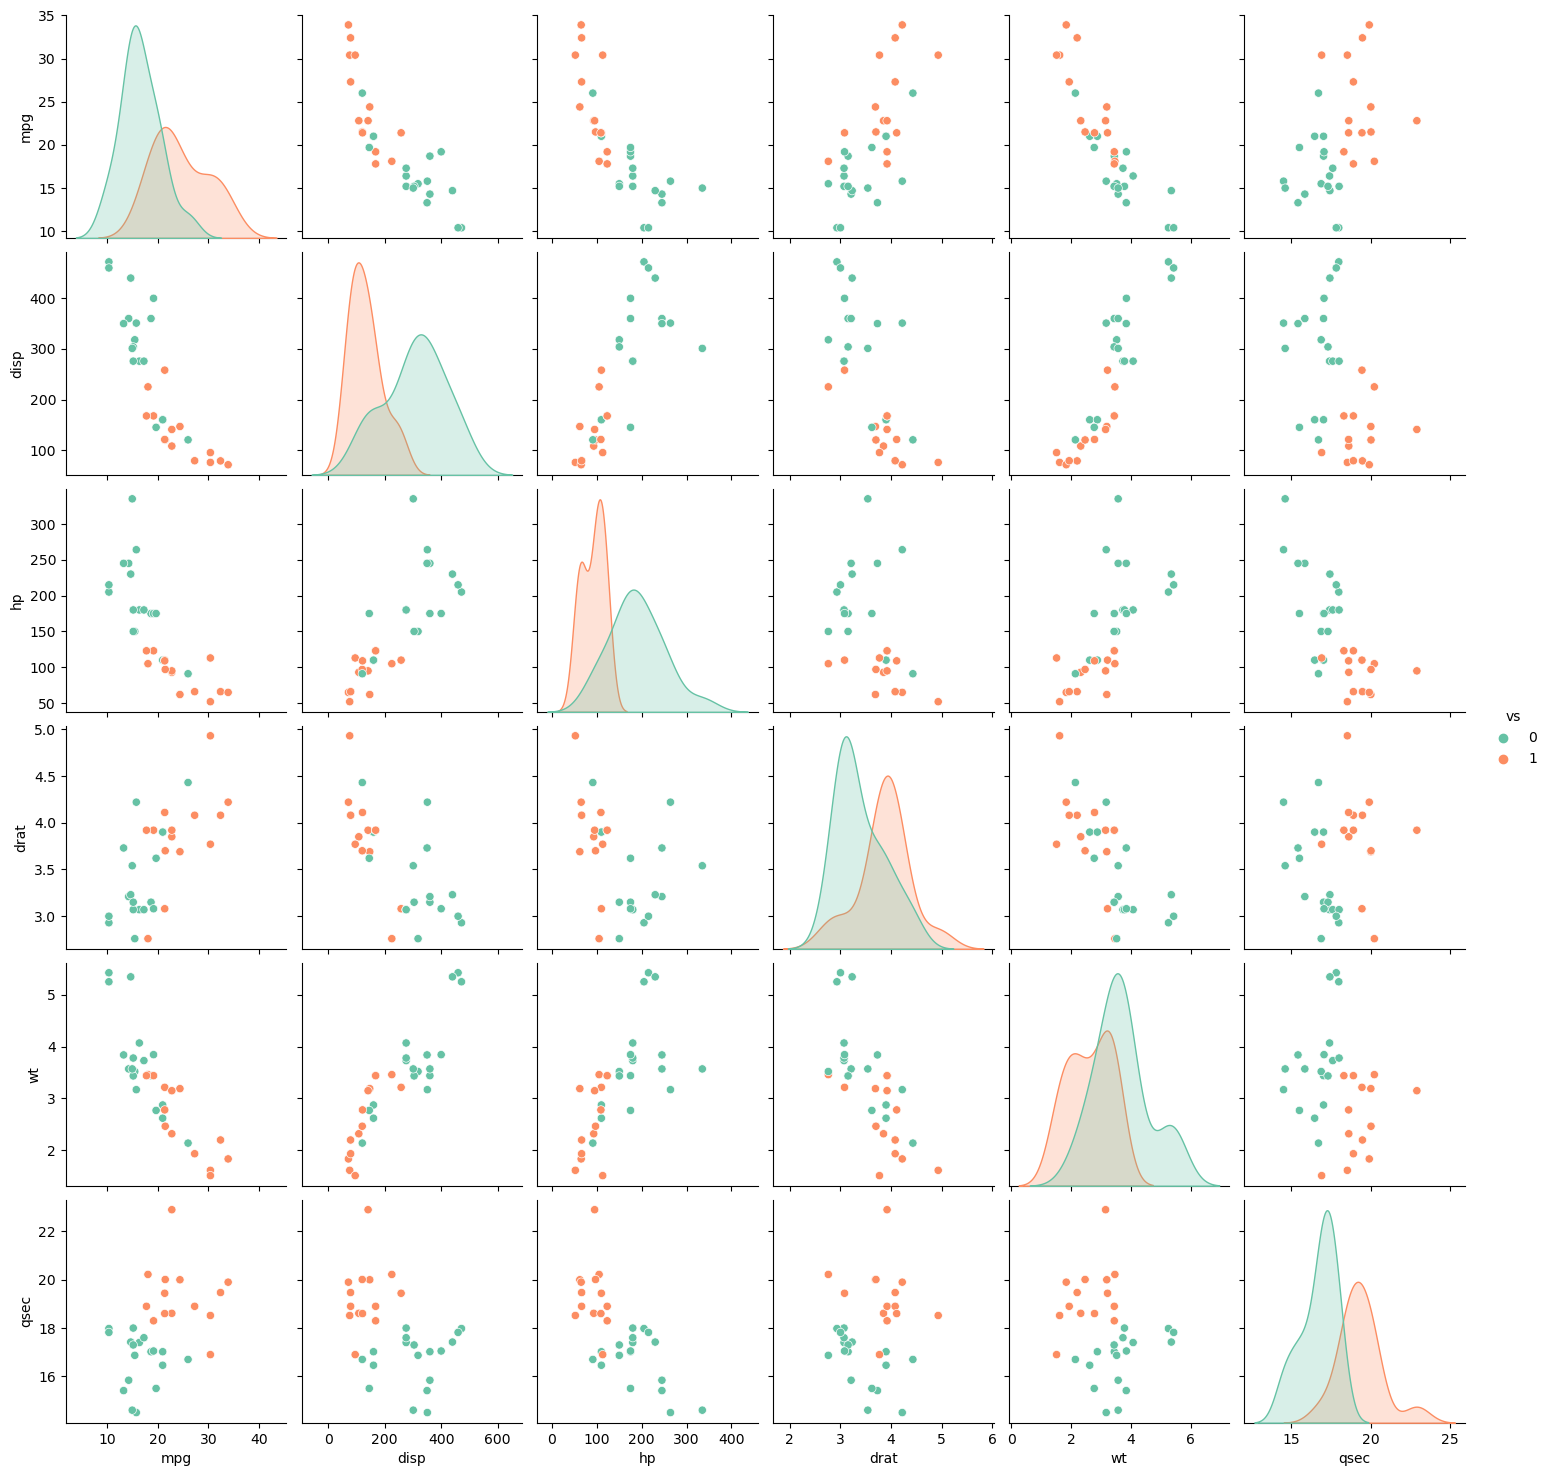

In [17]:
sns.pairplot(s1, hue = 'vs', palette = "Set2")